In [1]:
import numpy as np
import math
import pandas 
import random 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
######################## part 1 #######################
print("######################## part 1 #######################")
print("######################## part 1 #######################")
print("######################## part 1 #######################")
# read and shuffle
dataframe = pandas.read_csv("energy_efficiency_data.csv")
dataset = np.array(dataframe.values)
dataset_shuf = []
index_shuf = list(range(len(dataset)))
random.shuffle(index_shuf)
for i in index_shuf:
    dataset_shuf.append(dataset[i,:])   
dataset_shuf = np.array(dataset_shuf)
dataset_shuf.reshape(768,10)
print("[INFO] read and shuffle ..")
#

######################## part 1 #######################
######################## part 1 #######################
######################## part 1 #######################
[INFO] read and shuffle ..


In [3]:
#split
training_x = dataset_shuf[:576,0:8]
training_y = dataset_shuf[:576,8:9]
training_x.reshape(576,8)
training_y.reshape(576,1)

testing_x = dataset_shuf[576:,0:8]
testing_y = dataset_shuf[576:,8:9]
testing_x.reshape(192,8)
testing_y.reshape(192,1)
print("[INFO] spliting ..")
#

[INFO] spliting ..


In [4]:
#doning ont hot
transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [5,7])],remainder='passthrough')
training_x = np.array(transformer.fit_transform(training_x), dtype=np.float)

testing_x = np.array(transformer.fit_transform(testing_x), dtype=np.float)
print("[INFO] doning ont hot ..")
#

[INFO] doning ont hot ..


In [5]:
#normalization
scaled_x = np.copy(training_x[:,10:16])
scaled_x2 = np.copy(testing_x[:,10:16])

scaler = preprocessing.StandardScaler().fit(scaled_x)

scaled_x = scaler.transform(scaled_x)
scaled_x2 = scaler.transform(scaled_x2)
print("[INFO] normalization ..")
#

[INFO] normalization ..


In [6]:
training_x = np.copy(training_x[:,0:10])
testing_x = np.copy(testing_x[:,0:10])
training_x = np.append(training_x, scaled_x, axis = 1)
testing_x = np.append(testing_x, scaled_x2, axis = 1)

In [7]:
#
wh = np.random.random((16,64))-0.5
wh2 = np.random.random((64,64))-0.5
wh3 = np.random.random((64,64))-0.5
wh4 = np.random.random((64,64))-0.5
wh5 = np.random.random((64,8))-0.5
wo = np.random.random((8,1))-0.5
lr = 0.00005

bias = 0.02
bias1 = 0.02
bias2 = 0.02
bias3 = 0.02
bias4 = 0.02
bias5 = 0.02
#

In [8]:
#functions
def relu(x) :
    return x * (x > 0) + 0.01 * x * (x <= 0)

def relu_der(x) :
    return 1 * (x > 0) + 0.01 * (x <= 0)

def limit(x) :  
    while(np.max(x) > 0.1 or np.min(x) < -0.1) : 
            x /= 10
    return x      
#

now training  0.0 %
now training  2.0 %
now training  4.0 %
now training  6.0 %
now training  8.0 %
now training  10.0 %
now training  12.0 %
now training  14.0 %
now training  16.0 %
now training  18.0 %
now training  20.0 %
now training  22.0 %
now training  24.0 %
now training  26.0 %
now training  28.0 %
now training  30.0 %
now training  32.0 %
now training  34.0 %
now training  36.0 %
now training  38.0 %
now training  40.0 %
now training  42.0 %
now training  44.0 %
now training  46.0 %
now training  48.0 %
now training  50.0 %
now training  52.0 %
now training  54.0 %
now training  56.0 %
now training  58.0 %
now training  60.0 %
now training  62.0 %
now training  64.0 %
now training  66.0 %
now training  68.0 %
now training  70.0 %
now training  72.0 %
now training  74.0 %
now training  76.0 %
now training  78.0 %
now training  80.0 %
now training  82.0 %
now training  84.0 %
now training  86.0 %
now training  88.0 %
now training  90.0 %
now training  92.0 %
now training  94.0

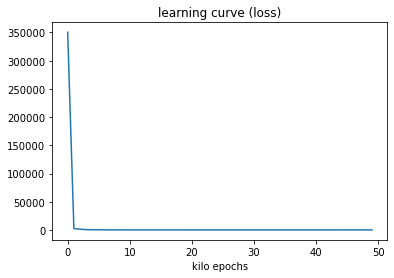

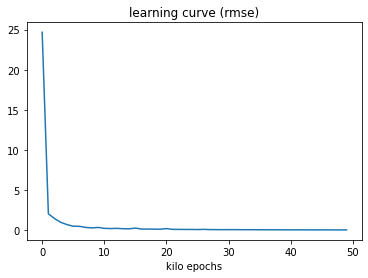

In [9]:
all_epoch = 50000
mini_batch = 16
bestloss1 = 1e30 
preloss = 1e30   

lossCurve = []
rmseCurve = []

for epoch in range(all_epoch):
    training_x_random = []
    training_y_random = []
    for i in range(mini_batch):
        rindex = random.randint(0,len(training_x)-1)
        training_x_random.append(training_x[rindex,:])
        training_y_random.append(training_y[rindex,:])
    training_x_random = np.array(training_x_random)
    training_y_random = np.array(training_y_random)
    
    
        
    ih = np.dot(training_x_random, wh) + bias
    oh = relu(ih)
    
    ih2 = np.dot(oh, wh2) + bias1
    oh2 = relu(ih2)
    ih3 = np.dot(oh2, wh3) + bias2
    oh3 = relu(ih3)
    ih4 = np.dot(oh3, wh4) + bias3
    oh4 = relu(ih4)
    ih5 = np.dot(oh4, wh5) + bias4
    oh5 = relu(ih5)
    input_op = np.dot(oh5, wo) + bias5
    output_op = relu(input_op)
    
    
    
    #1
    
    de_doo = output_op - training_y_random
    doo_dio = relu_der(input_op)
    dino_dwo = oh5      
    de_dwo = np.dot(dino_dwo.T, de_doo * doo_dio)
    de_db5 = de_doo * doo_dio
    
    #2
    
    de_dio = de_doo * doo_dio
    dio_doh5 = wo
    de_doh5 = np.dot(de_dio, dio_doh5.T)
    doh5_dih5 = relu_der(ih5)
    dih5_dwh5 = oh4
    de_dwh5 = np.dot(dih5_dwh5.T, doh5_dih5 * de_doh5)
    de_db4 = doh5_dih5 * de_doh5
    
    #3
    
    de_dih5 = de_doh5 * doh5_dih5
    dih5_doh4 = wh5
    de_doh4 = np.dot(de_dih5, dih5_doh4.T)
    doh4_dih4 = relu_der(ih4)
    dih4_dwh4 = oh3
    de_dwh4 = np.dot(dih4_dwh4.T, doh4_dih4 * de_doh4)
    de_db3 = doh4_dih4 * de_doh4
    
    #4
    
    de_dih4 = de_doh4 * doh4_dih4
    dih4_doh3 = wh4
    de_doh3 = np.dot(de_dih4, dih4_doh3.T)
    doh3_dih3 = relu_der(ih3)
    dinh3_dwh3 = oh2
    de_dwh3 = np.dot(dinh3_dwh3.T, doh3_dih3 * de_doh3)
    de_db2 = doh3_dih3 * de_doh3
    
    #5
    
    de_dih3 = de_doh3 * doh3_dih3
    dih3_doh2 = wh3
    de_doh2 = np.dot(de_dih3, dih3_doh2.T)
    doh2_dih2 = relu_der(ih2)
    dinh2_dwh2 = oh
    de_dwh2 = np.dot(dinh2_dwh2.T, doh2_dih2 * de_doh2)
    de_db1 = doh2_dih2 * de_doh2
    
    #6
    
    de_dih2 = de_doh2 * doh2_dih2
    dih2_doh = wh2
    de_doh = np.dot(de_dih2, dih2_doh.T)
    doh_dih = relu_der(ih)
    dinh_dwh = training_x_random
    de_dwh = np.dot(dinh_dwh.T, doh_dih * de_doh)
    de_db = doh_dih * de_doh
    
    #
       
    
    
    wh -= limit(lr * de_dwh)
    wh2 -= limit(lr * de_dwh2)
    wh3 -= limit(lr * de_dwh3)
    wh4 -= limit(lr * de_dwh4)
    wh5 -= limit(lr * de_dwh5)
    wo -= limit(lr * de_dwo)
    
    bias -= lr * de_db.sum()/np.size(de_db)
    bias1 -= lr * de_db1.sum()/np.size(de_db1)
    bias2 -= lr * de_db2.sum()/np.size(de_db2)
    bias3 -= lr * de_db3.sum()/np.size(de_db3)
    bias4 -= lr * de_db4.sum()/np.size(de_db4)
    bias5 -= lr * de_db5.sum()/np.size(de_db5)
    
    error_out = np.power((output_op - training_y_random), 2)

    if epoch % 1000 == 0 : 
        ih = np.dot(training_x, wh) + bias
        oh = relu(ih)
        ih2 = np.dot(oh, wh2) + bias1
        oh2 = relu(ih2)
        ih3 = np.dot(oh2, wh3) + bias2
        oh3 = relu(ih3)
        ih4 = np.dot(oh3, wh4) + bias3
        oh4 = relu(ih4)
        ih5 = np.dot(oh4, wh5) + bias4
        oh5 = relu(ih5)
        input_op = np.dot(oh5, wo)+ bias5
        output_op = relu(input_op)
        
        error_out = np.power((output_op - training_y), 2)
   
        if error_out.sum() > preloss :
            lr *= 0.95
            
        preloss = error_out.sum()  
              
        lossCurve.append(error_out.sum())
        rmseCurve.append(math.sqrt(error_out.sum()/len(training_y)))
        print('now training ',epoch*100/all_epoch,'%')


print("  [RESULT]  ")

plt.plot(lossCurve)
plt.title('learning curve (loss)')
plt.xlabel('kilo epochs')

plt.show()

print("")

plt.plot(rmseCurve)
plt.title('learning curve (rmse)')
plt.xlabel('kilo epochs')

plt.show()

  [RESULT]  trainingg
rmse =  0.05960862375656998


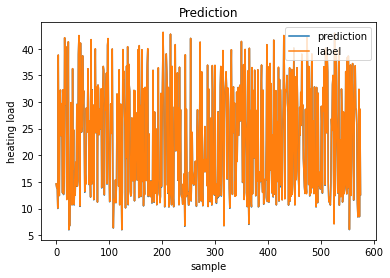

In [10]:
ih = np.dot(training_x, wh) + bias
oh = relu(ih)
ih2 = np.dot(oh, wh2) + bias1
oh2 = relu(ih2)
ih3 = np.dot(oh2, wh3) + bias2
oh3 = relu(ih3)
ih4 = np.dot(oh3, wh4) + bias3
oh4 = relu(ih4)
ih5 = np.dot(oh4, wh5) + bias4
oh5 = relu(ih5)
input_op = np.dot(oh5, wo)
output_op = relu(input_op)
error_out = ((1 / len(training_y)) * (np.power((output_op - training_y), 2)))
print("  [RESULT]  trainingg")
print("rmse = ",math.sqrt(error_out.sum()))

p1, = plt.plot(output_op)
p2, = plt.plot(training_y)
plt.title('Prediction')
plt.legend([p1, p2], ["prediction", "label"])
plt.xlabel('sample')
plt.ylabel('heating load')

plt.show()

  [RESULT]  trainingg
rmse =  0.8940463103093096


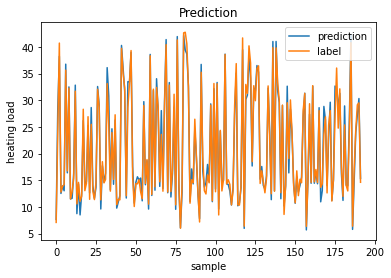

In [11]:
ih = np.dot(testing_x, wh) + bias
oh = relu(ih)
ih2 = np.dot(oh, wh2) + bias1
oh2 = relu(ih2)
ih3 = np.dot(oh2, wh3) + bias2
oh3 = relu(ih3)
ih4 = np.dot(oh3, wh4) + bias3
oh4 = relu(ih4)
ih5 = np.dot(oh4, wh5) + bias4
oh5 = relu(ih5)
input_op = np.dot(oh5, wo)
output_op = relu(input_op)
error_out = ((1 / len(training_y)) * (np.power((output_op - testing_y), 2)))
print("  [RESULT]  trainingg")
print("rmse = ",math.sqrt(error_out.sum()))
p1, = plt.plot(output_op)
p2, = plt.plot(testing_y)
plt.title('Prediction')
plt.legend([p1, p2], ["prediction", "label"])
plt.xlabel('sample')
plt.ylabel('heating load')

plt.show()

In [32]:
epochtimes = 20000
mini_batch = 16

for p in range(8) :   
    if p == 0 :
        wh = np.random.random((12,8))-0.5
    elif p == 1 :
        wh = np.random.random((10,8))-0.5
    else :
        wh = np.random.random((15,8))-0.5
        
    wh2 = np.random.random((8,16))-0.5
    wh3 = np.random.random((16,16))-0.5
    wh4 = np.random.random((16,4))-0.5
    wh5 = np.random.random((4,2))-0.5
    wo = np.random.random((2,1))-0.5
    lr = 0.00003
    
    bias = 0.01
    bias1 = 0.01
    bias2 = 0.01
    bias3 = 0.01
    bias4 = 0.01
    bias5 = 0.01
    
    preloss = 1e30   #decay the learning rate
   
    lossCurve = []
    rmseCurve = []
    
    for epoch in range(epochtimes):
        
        training_x_random = []
        training_y_random = []
        for i in range(mini_batch):
            rindex = random.randint(0,len(training_x)-1)
            training_x_random.append(training_x[rindex,:])
            training_y_random.append(training_y[rindex,:])
                             
        training_x_random = np.array(training_x_random)
        training_y_random = np.array(training_y_random)
       
        if p == 0 :
            a1 = 0
            a2 = 4
        elif p == 1 :      
            a1 = 4
            a2 = 10
        else :
            a1 = 8 + p 
            a2 = 9 + p
        
        for i in range(a1, a2):
            training_x_random = np.delete(training_x_random, i, axis = 1)
              
        
        
            
        ih = np.dot(training_x_random, wh) + bias
        oh = relu(ih)
        
        ih2 = np.dot(oh, wh2) + bias1
        oh2 = relu(ih2)
        ih3 = np.dot(oh2, wh3) + bias2
        oh3 = relu(ih3)
        ih4 = np.dot(oh3, wh4) + bias3
        oh4 = relu(ih4)
        ih5 = np.dot(oh4, wh5) + bias4
        oh5 = relu(ih5)
        input_op = np.dot(oh5, wo) + bias5
        output_op = relu(input_op)
        
        
        
        #1
        
        de_doo = output_op - training_y_random
        doo_dio = relu_der(input_op)
        dino_dwo = oh5      
        de_dwo = np.dot(dino_dwo.T, de_doo * doo_dio)
        de_db5 = de_doo * doo_dio
        
        #2
        
        de_dio = de_doo * doo_dio
        dio_doh5 = wo
        de_doh5 = np.dot(de_dio, dio_doh5.T)
        doh5_dih5 = relu_der(ih5)
        dih5_dwh5 = oh4
        de_dwh5 = np.dot(dih5_dwh5.T, doh5_dih5 * de_doh5)
        de_db4 = doh5_dih5 * de_doh5
        
        #3
        
        de_dih5 = de_doh5 * doh5_dih5
        dih5_doh4 = wh5
        de_doh4 = np.dot(de_dih5, dih5_doh4.T)
        doh4_dih4 = relu_der(ih4)
        dih4_dwh4 = oh3
        de_dwh4 = np.dot(dih4_dwh4.T, doh4_dih4 * de_doh4)
        de_db3 = doh4_dih4 * de_doh4
        
        #4
        
        de_dih4 = de_doh4 * doh4_dih4
        dih4_doh3 = wh4
        de_doh3 = np.dot(de_dih4, dih4_doh3.T)
        doh3_dih3 = relu_der(ih3)
        dinh3_dwh3 = oh2
        de_dwh3 = np.dot(dinh3_dwh3.T, doh3_dih3 * de_doh3)
        de_db2 = doh3_dih3 * de_doh3
        
        #5
        
        de_dih3 = de_doh3 * doh3_dih3
        dih3_doh2 = wh3
        de_doh2 = np.dot(de_dih3, dih3_doh2.T)
        doh2_dih2 = relu_der(ih2)
        dinh2_dwh2 = oh
        de_dwh2 = np.dot(dinh2_dwh2.T, doh2_dih2 * de_doh2)
        de_db1 = doh2_dih2 * de_doh2
        
        #6
        
        de_dih2 = de_doh2 * doh2_dih2
        dih2_doh = wh2
        de_doh = np.dot(de_dih2, dih2_doh.T)
        doh_dih = relu_der(ih)
        dinh_dwh = training_x_random
        de_dwh = np.dot(dinh_dwh.T, doh_dih * de_doh)
        de_db = doh_dih * de_doh
        
        #
           
        
        
        wh -= limit(lr * de_dwh)
        wh2 -= limit(lr * de_dwh2)
        wh3 -= limit(lr * de_dwh3)
        wh4 -= limit(lr * de_dwh4)
        wh5 -= limit(lr * de_dwh5)
        wo -= limit(lr * de_dwo)
        
        bias -= lr * de_db.sum()/np.size(de_db)
        bias1 -= lr * de_db1.sum()/np.size(de_db1)
        bias2 -= lr * de_db2.sum()/np.size(de_db2)
        bias3 -= lr * de_db3.sum()/np.size(de_db3)
        bias4 -= lr * de_db4.sum()/np.size(de_db4)
        bias5 -= lr * de_db5.sum()/np.size(de_db5)
        
        error_out = np.power((output_op - training_y_random), 2)
    
    tx = np.copy(training_x)
    for i in range(a1, a2):
        tx = np.delete(tx, i, axis = 1)
    
    ih = np.dot(tx, wh) + bias
    oh = relu(ih)
    ih2 = np.dot(oh, wh2) + bias1
    oh2 = relu(ih2)
    ih3 = np.dot(oh2, wh3) + bias2
    oh3 = relu(ih3)
    ih4 = np.dot(oh3, wh4) + bias3
    oh4 = relu(ih4)
    ih5 = np.dot(oh4, wh5) + bias4
    oh5 = relu(ih5)
    input_op = np.dot(oh5, wo)+ bias5
    output_op = relu(input_op)
        
    error_out = np.power((output_op - training_y), 2)
       
    print("-------------")
    print('now training %d feature', p)
    print('loss:',error_out.sum())
    print('rmse:',math.sqrt(error_out.sum()/len(training_y)))
            
    """
    print("")
    print("=====================================")
    print("")
    
    plt.plot(lossCurve)
    plt.title('learningCurve_loss')
    plt.xlabel('kilo epochs')
    
    plt.show()
    
    print("")
    print("=====================================")
    print("")
    
    plt.plot(rmseCurve)
    plt.title('learningCurve_rmse')
    plt.xlabel('kilo epochs')
    
    plt.show()
    """



-------------
now training %d feature 0
loss: 562.3158681925989
rmse: 0.9880500122581154
-------------
now training %d feature 1
loss: 2337.9064962732655
rmse: 2.0146626131734475
-------------
now training %d feature 2
loss: 188.61119310725445
rmse: 0.5722324597866044
-------------
now training %d feature 3
loss: 601.6899982335465
rmse: 1.0220570881206612
-------------
now training %d feature 4
loss: 1664.663923154657
rmse: 1.7000122156192328
-------------
now training %d feature 5
loss: 148975.87038649077
rmse: 16.082246853765035
-------------
now training %d feature 6
loss: 1301.4606976063974
rmse: 1.5031568041255325
-------------
now training %d feature 7
loss: 3370.958929905152
rmse: 2.419164990923016
